In [1]:
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

# Introducción a las convnets: Clasificando números



Vamos a echarle un vistazo a un ejemplo sencillo de una convnet. La utilizaremos para clasificar el dataset MNIST, que es un dataset abierto que contiene números escritos a mano. 

![Números escritos a mano del dataset MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Vamos a crear una primera convnet basica. Es una pila de capas `Conv2D` y `MaxPooling2D`. 
Lo importante es notar que una convnet toma como input tensores de tamaño `(altura_imagen, anchura_imagen, canales_imagen)`. 
Para ello primero hay que averiguar el tamaño de las imágenes de nuestro dataset. 

La red debe tener las siguientes capas:

- Una capa convolucional (Conv2D) con 32 filtros de 3x3 y activación relu. En esta primera capa deberás indicar el tamaño del input (input_shape).
- Una segunda capa de Max Pooling (MaxPooling2D) de 2x2
- Una tercera capa convolucional con 64 filtros de 3x3 y activación relu
- Una cuarta capa de Max Pooling (MaxPooling2D) de 2x2
- Una quinta capa convolucional de 64 filtros de 3x3 y activación relu

Sabrás que lo has hecho bien cuando el output de model.summary() sea:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


2022-04-16 00:24:15.630049: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-16 00:24:15.630210: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-16 00:24:15.630709: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Puedes ver arriba que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D de dimensiones `(altura, anchura, canales)`. La anchura y la altura tienden a diminuir según vamos yendo mas profundo en la red. El número de canales está controlado por el primer argumento que se le pasa a 
las capas `Conv2D`  (e.j. 32 o 64).

El siguiente paso sería darle nuestro ultimo tensor (de dimensiones `(3, 3, 64)`) como entrada a una red densamente conectada. 
Estos clasificadores procesan vectores, que son 1D,  mientras que nuestra salida es un tensor 3D. 
Así que primero tendremos que aplanar nuestra salida 3D y convertirla en 1D y después añadir unas cuantas capas densas:

- Primero aplana la salida (flatten())
- Añade una primera capa de 64 neuronas y activación relu
- Añade una última capa de 10 neuronas (tantas como números puedes clasificar) y activación softwmax

Sabrás que lo has hecho bien cuando el summary tenga esta pinta:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Queremos clasificar 10 categorías, lo que significa que nuestra capa final debe tener 10 nodos y una función de activación softmax. Vamos a ver que pinta tiene nuestra red:

Como puedes ver, nuestra salida de dimension `(3, 3, 64)` han sido aplanadas hasta convertirse en vectores de dimensión `(576,)`, antes de entrar en las dos capas densas.

Vamos ahora a entrenar nuestra red con las imágenes del dataset MNIST.

Leemos a continuación el dataset y lo metemos dentro de vectores: train_images, train_labels, test_images, test_labels

Antes de continuar, imprime:

- ¿Cual es el tamaño del dataset de training?
- ¿Qué pinta tiene el dataset de training?
- ¿Qué pinta tienen las etiquetas de training?
- Imprime la cuarta imagen del dataset de training


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



¿Cual es el tamaño del dataset de training?
El tamaño de train es: 60000

¿Qué pinta tiene el dataset de training?
La pinta del dataset train es: (60000, 28, 28, 1)

¿Qué pinta tienen las etiquetas de training?
Las etiquetas de train son: (60000, 10)



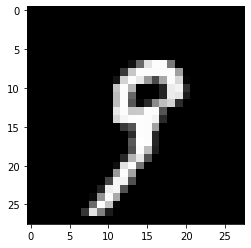

In [27]:
import matplotlib.pyplot as plt
print(f'¿Cual es el tamaño del dataset de training?\nEl tamaño de train es: {len(train_images)}\n')
print(f'¿Qué pinta tiene el dataset de training?\nLa pinta del dataset train es: {train_images.shape}\n')
print(f'¿Qué pinta tienen las etiquetas de training?\nLas etiquetas de train son: {train_labels.shape}\n')
plt.imshow(train_images[19,:,:])
plt.gray()

A continuación vas a darle la forma adecuada a los datasets de training y test para poder meterlos a la red neuronal. Pasa las labels, que ahora mismo son números, a su forma categórica.

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



Compila el modelo indicando cuales son los datos de entrenamiento y sus etiquetas. Utilizando el optimizador "rmsprop" y como loss function usa la entropía cruzada categórica.
Entrena después el modelo durante 5 épocas y un tamaño de batch de 64.

In [7]:
model.compile(loss='categorical_crossentropy' , optimizer="rmsprop" , metrics=['accuracy'])
model.fit(train_images,train_labels ,batch_size=64 , epochs=5)

2022-04-16 00:24:19.326874: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-16 00:24:19.329331: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3401065000 Hz


Epoch 1/5
938/938 [==============================] - 41s 42ms/step - loss: 0.3747 - accuracy: 0.8796
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0499 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0309 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0178 - accuracy: 0.9946


Vamos a evaluar el modelo con las imágenes de test:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 9ms/step - loss: 0.0306 - accuracy: 0.9918


Imprime la accuracy del test que acabas de realizar:

In [9]:
print(f'La accuracy es: {test_acc}\n')

La accuracy es: 0.9918000102043152



Crea una imagen con un número escrito a mano y mira cual es la predicción. Prueba con unos cuantos números...¿Lo hace bien? 

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

img_width=28
img_height=28

img = image.load_img('siete.png', target_size=(img_width, img_height),grayscale=True)
x= np.abs(image.img_to_array(img)-255)
x = np.expand_dims(x, axis=0)




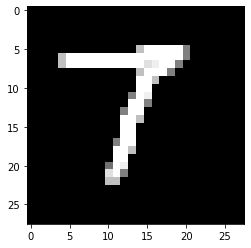

In [32]:

plt.imshow(x[0,:,:,:])
plt.gray()

In [12]:
model.save('net_numbers.h5')

Carga el modelo que acabas de guardar (load) y haz una predicción (predict_classes) con la imágen del número que acabas de escribir.



In [13]:
model = models.load_model('net_numbers.h5')

In [33]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)